## Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data set
sales_df = pd.read_csv("sales_data_with_discounts.csv")
sales_df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [3]:
# Finding datatypes
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


### Descriptive Analytics for Numerical Columns

##### Calculate the mean, median, mode, and standard deviation for these columns.

In [4]:
# To find Mean of Numerical columns
mean = sales_df.mean(numeric_only=True)
print(np.round(mean,3))

Volume                   5.067
Avg Price            10453.433
Total Sales Value    33812.836
Discount Rate (%)       15.155
Discount Amount       3346.499
Net Sales Value      30466.336
dtype: float64


In [5]:
# Median
median = sales_df.median(numeric_only=True)
print(np.round(median,3))

Volume                  4.000
Avg Price            1450.000
Total Sales Value    5700.000
Discount Rate (%)      16.578
Discount Amount       988.934
Net Sales Value      4677.788
dtype: float64


In [6]:
# Mode
mode = sales_df.mode(numeric_only=True).iloc[0]
print(np.round(mode,3))

Volume                   3.000
Avg Price              400.000
Total Sales Value    24300.000
Discount Rate (%)        5.008
Discount Amount         69.178
Net Sales Value        326.975
Name: 0, dtype: float64


In [7]:
# Standard Deviation
std = sales_df.std(numeric_only=True)
print(np.round(std,3))

Volume                   4.232
Avg Price            18079.905
Total Sales Value    50535.074
Discount Rate (%)        4.221
Discount Amount       4509.903
Net Sales Value      46358.657
dtype: float64


### Data Visualization

In [8]:
# Importing Libraries

import matplotlib.pyplot as plt
import seaborn as sns

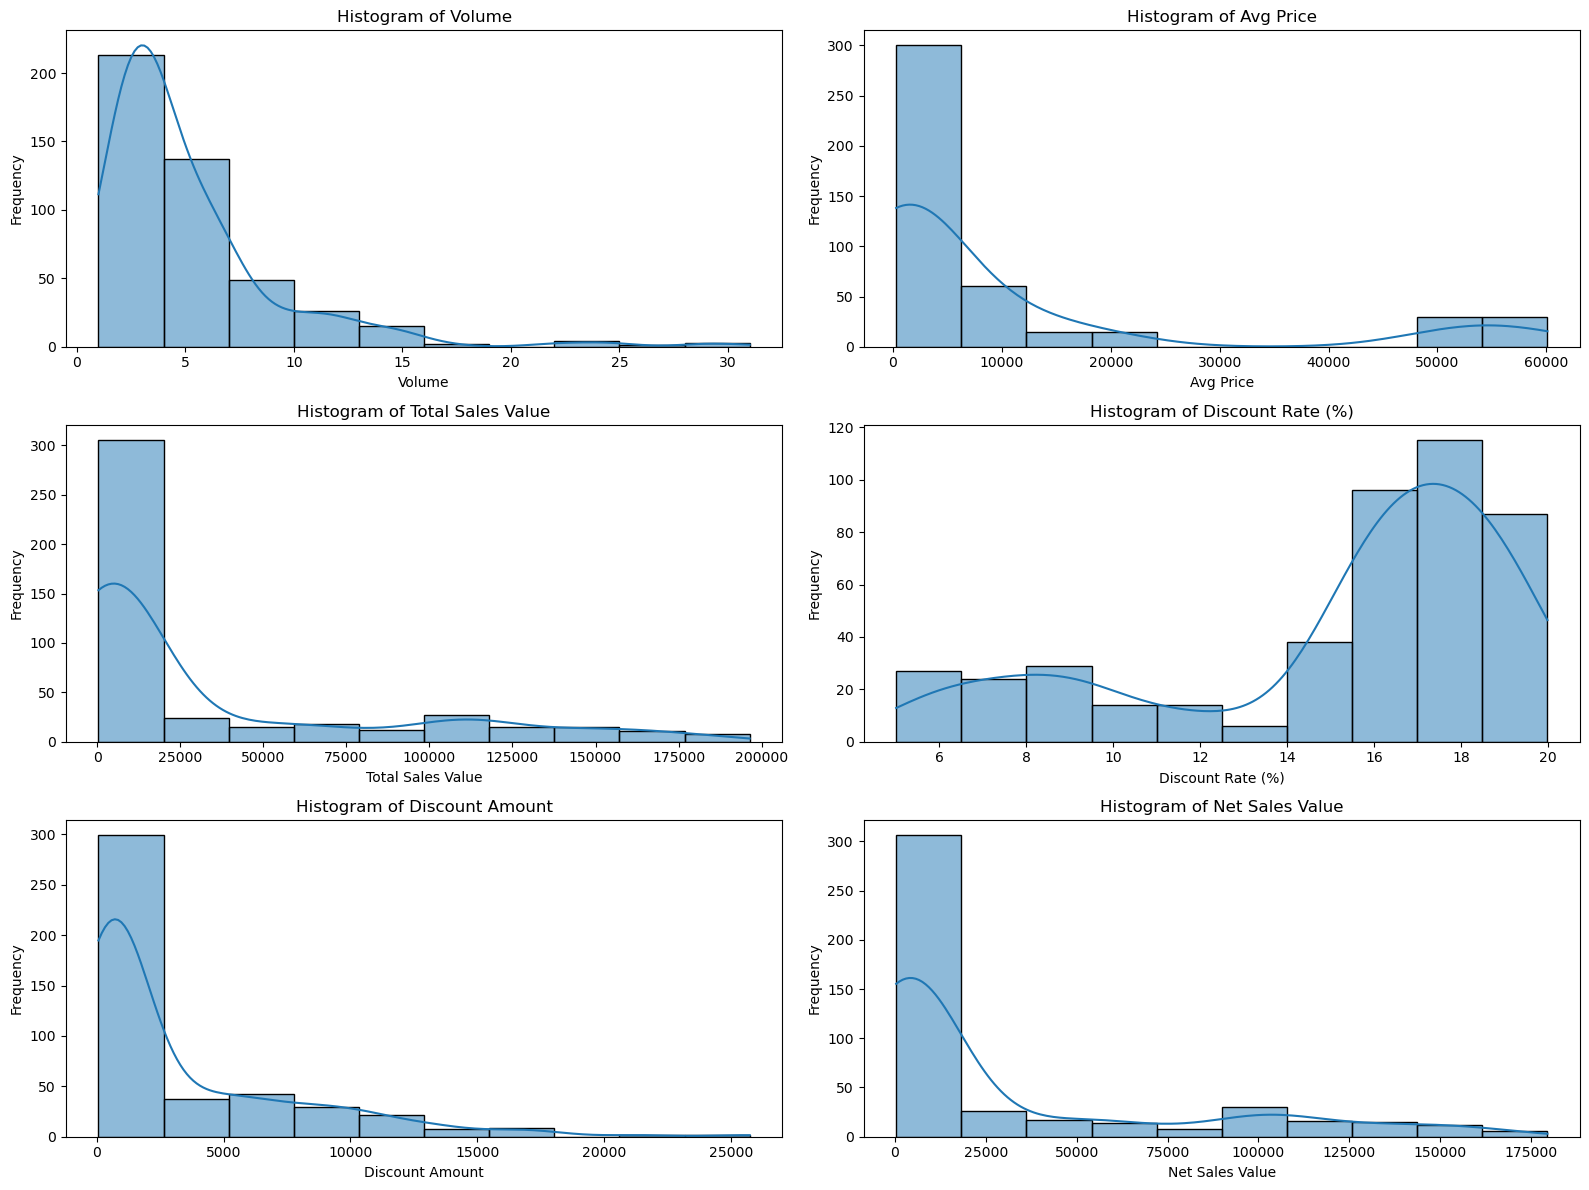

In [9]:
# HISTOGRAM

# list of numerical columns
num_col = sales_df.select_dtypes(include = ['float64', 'int64']).columns

# plot Histogram for each numerical column
fig = plt.figure(figsize = (16,12))
for i, column in enumerate( num_col,1):
    plt.subplot(3,2,i)
    sns.histplot(sales_df[column], bins = 10, kde = True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
fig.savefig('Histogram.png')

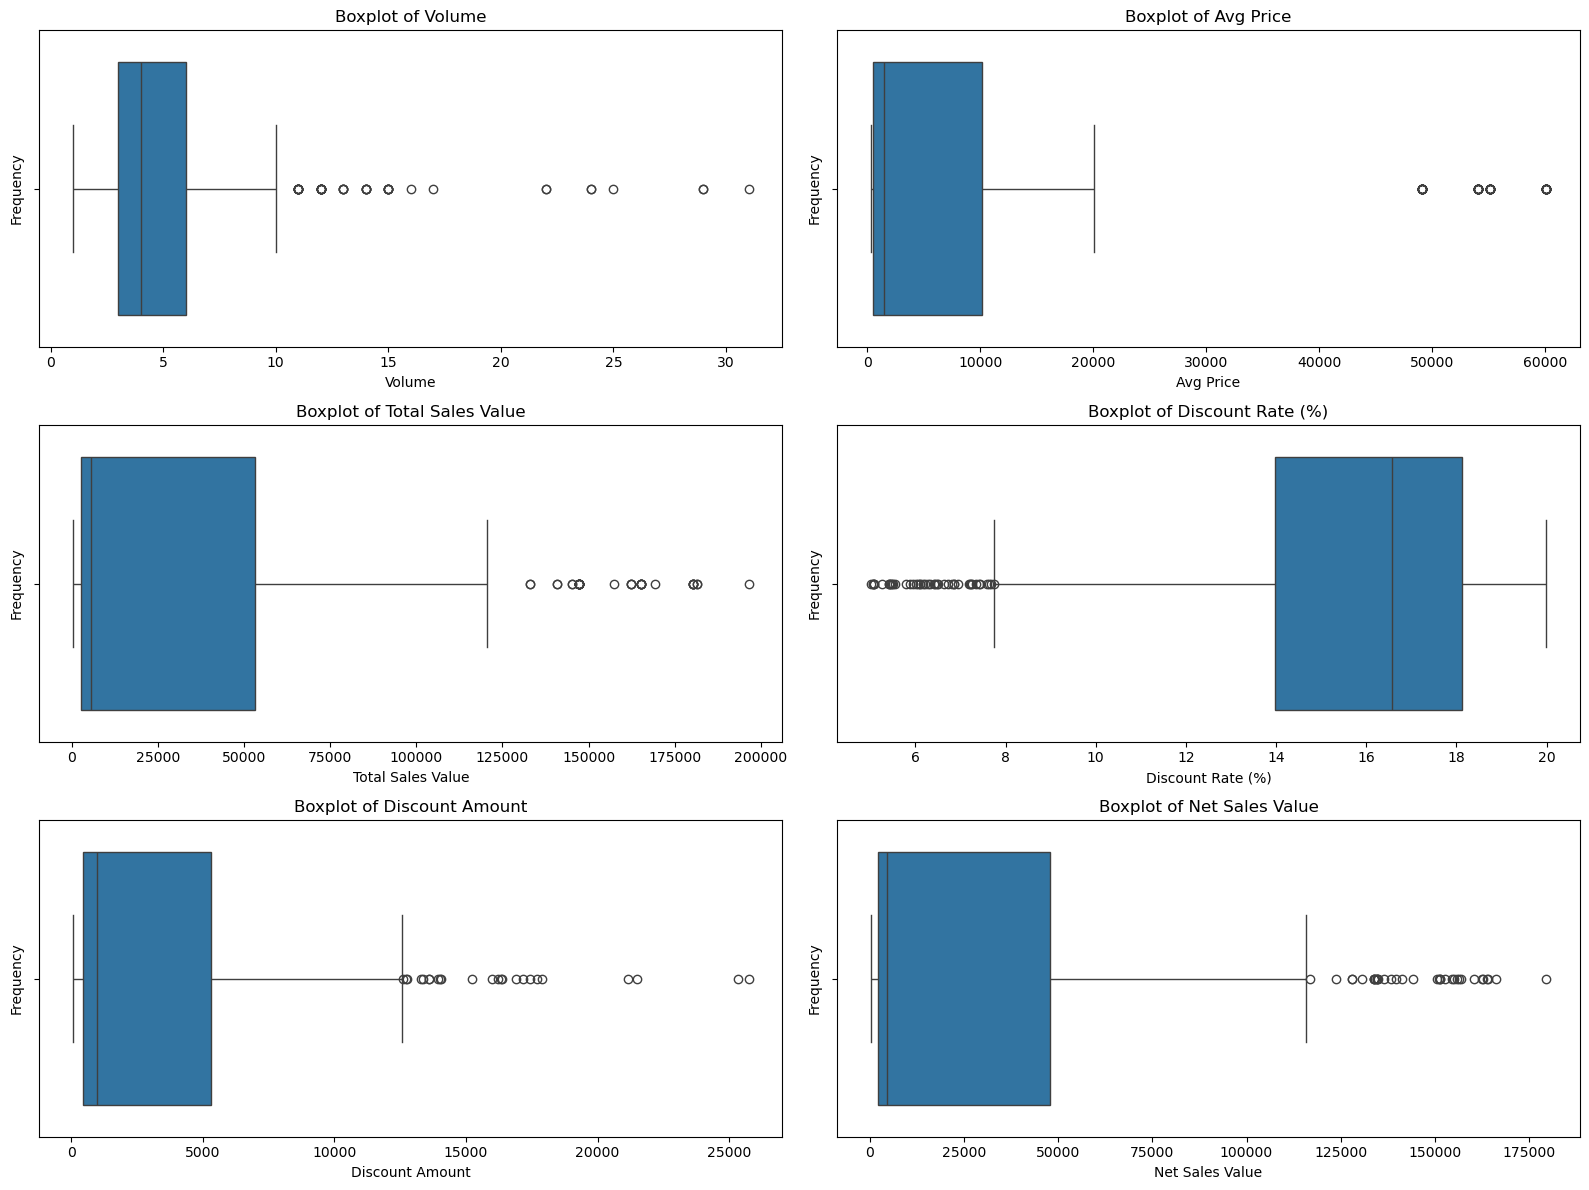

In [10]:
# BOXPLOT
import matplotlib.pyplot as plt
import seaborn as sns

# list of numerical columns
num_col = sales_df.select_dtypes(include = ['float64', 'int64']).columns

# plot Boxplot for each numerical column
Box = plt.figure(figsize = (16,12))
for i, column in enumerate( num_col,1):
    plt.subplot(3,2,i)
    sns.boxplot(x = sales_df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
Box.savefig('Boxplot.png')

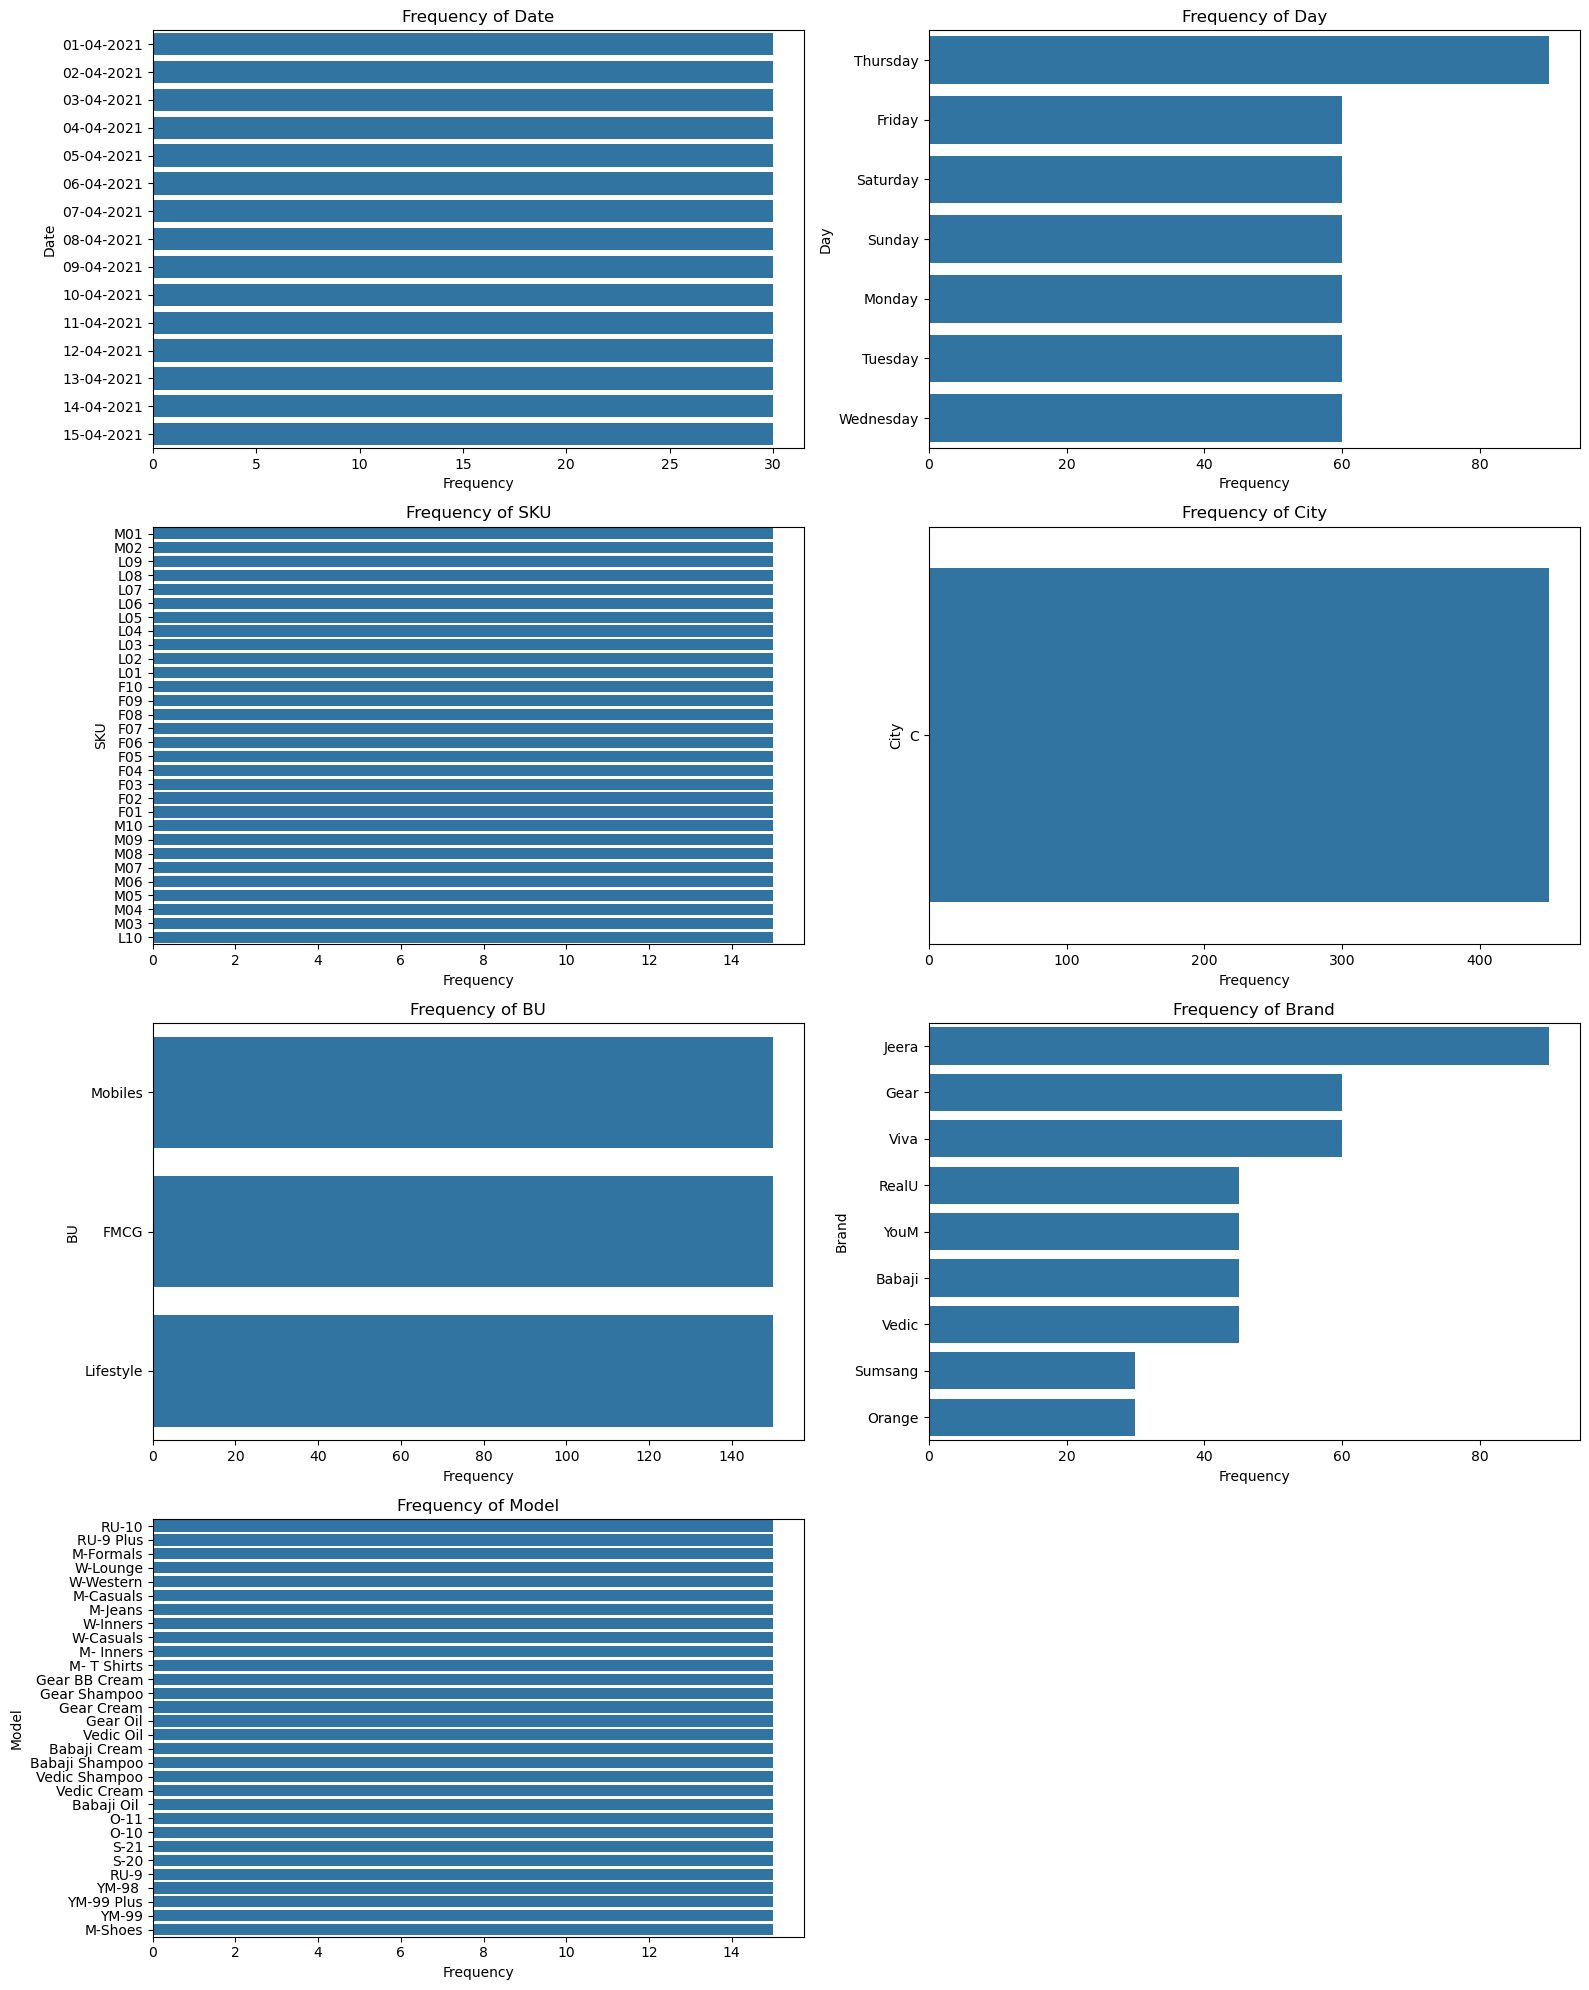

In [11]:
# BARPLOT
import matplotlib.pyplot as plt
import seaborn as sns

# list of categorical columns
cat_col = sales_df.select_dtypes(include = ['object']).columns

# plot Boxplot for each numerical column
Bar = plt.figure(figsize=(16,20))
for i, column in enumerate(cat_col, 1):
    plt.subplot(4, 2, i)
    freq = sales_df[column].value_counts()
    sns.barplot(x=freq.values, y=freq.index, orient='h')
    plt.title(f'Frequency of {column}')
    plt.xlabel('Frequency')
    plt.ylabel(column)
    plt.tight_layout()

plt.show()
Bar.savefig('Barplot.png')

## Standardization of Numerical Variables

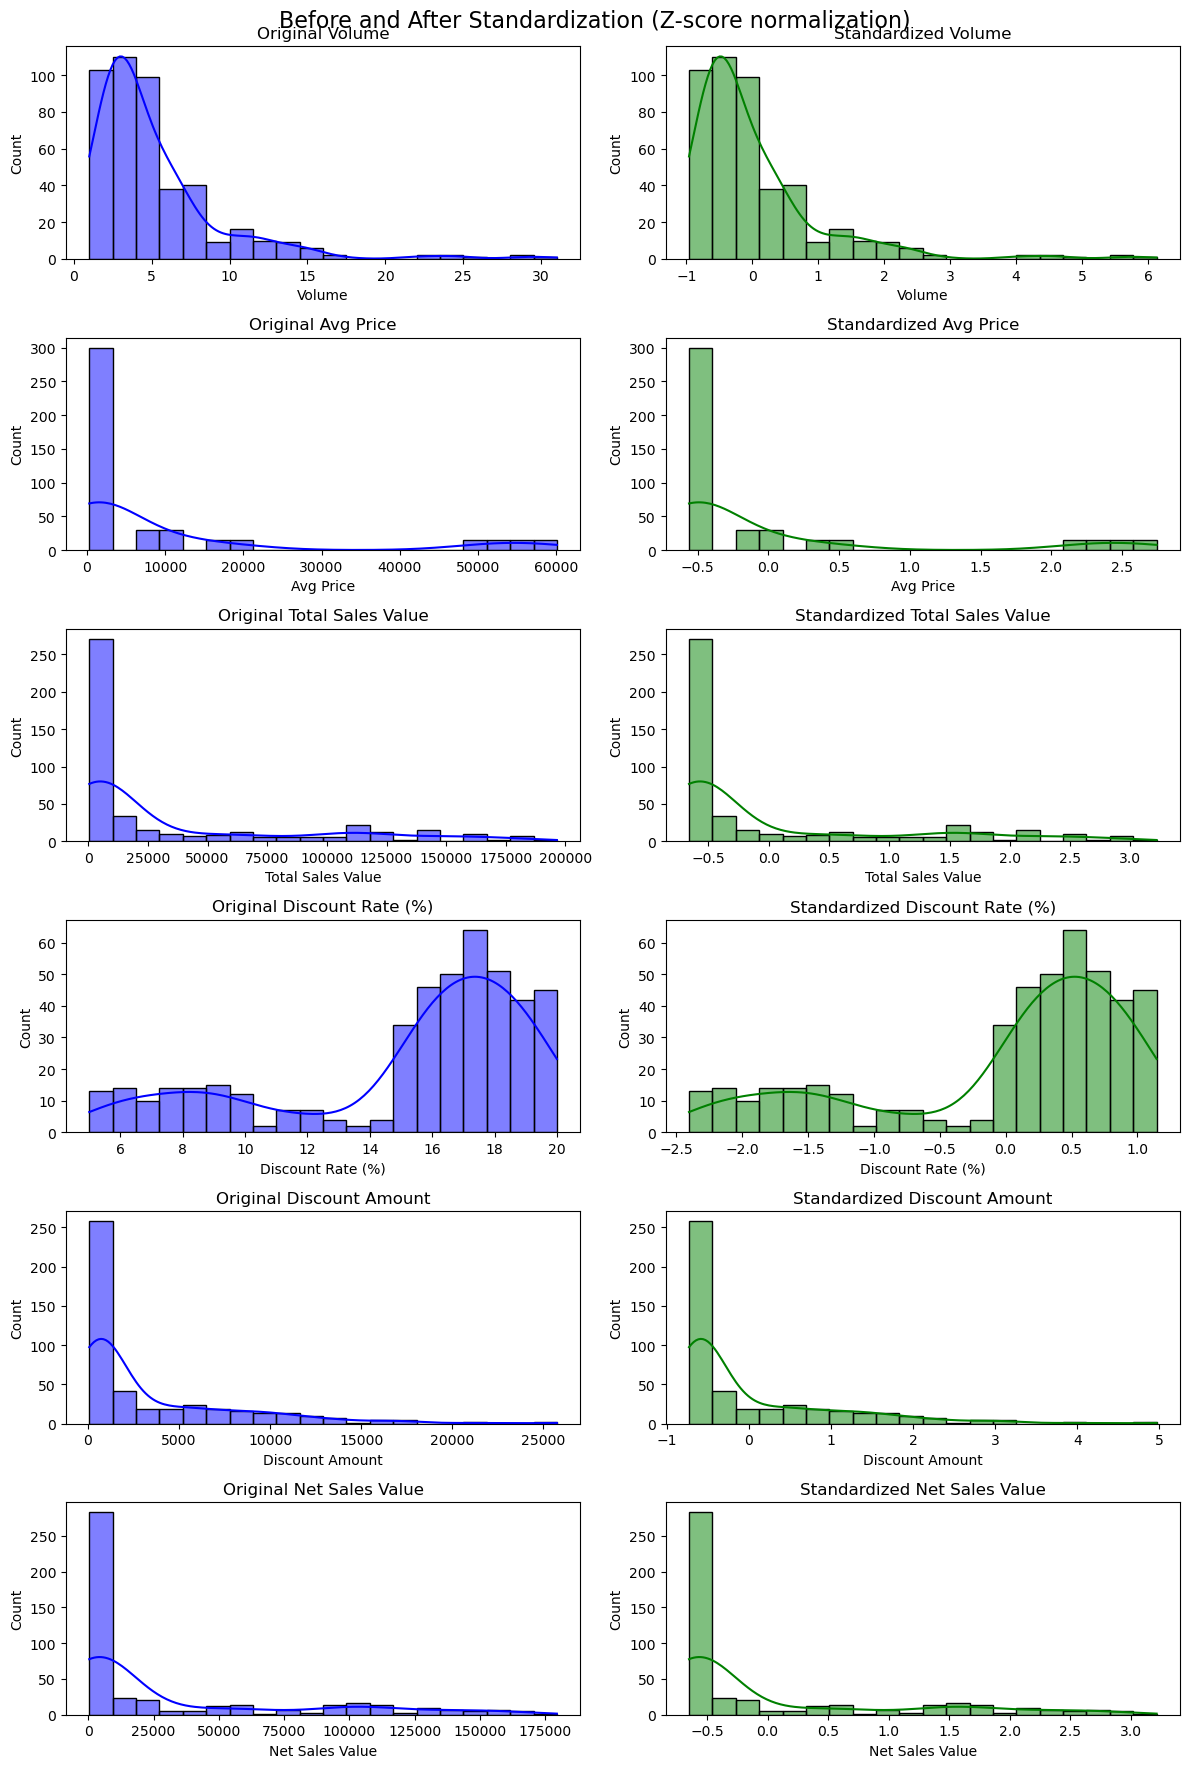

In [12]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Select numerical columns for manual Z-score normalization
numerical_columns = sales_df.select_dtypes(include = ['float64', 'int64']).columns

# Before standardization: Plot histograms of original numerical data
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, 18))
fig.suptitle('Before and After Standardization (Z-score normalization)', fontsize=16)

# Calculate mean and std for each column
means = sales_df[numerical_columns].mean()
stds = sales_df[numerical_columns].std()

# Apply manual Z-score normalization (using formula Z = (X - mean) / std)
sales_df_standardized_manual = sales_df.copy()
for col in numerical_columns:
    sales_df_standardized_manual[col] = (sales_df[col] - means[col]) / stds[col]

# Plot histograms before and after standardization using Seaborn
for i, col in enumerate(numerical_columns):
    # Original distribution
    sns.histplot(sales_df[col], bins=20, kde=True, ax=axes[i, 0], color='blue')
    axes[i, 0].set_title(f'Original {col}')
    
    # Standardized distribution
    sns.histplot(sales_df_standardized_manual[col], bins=20, kde=True, ax=axes[i, 1], color='green')
    axes[i, 1].set_title(f'Standardized {col}')

plt.tight_layout()
plt.show()
fig.savefig('HISTO.png')

## Conversion of Categorical Data into Dummy Variables

In [14]:
cat_col = sales_df.select_dtypes(include = ['object']).columns

df = pd.get_dummies(data = sales_df, columns = cat_col)
df.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
